# DD2424 Deep Learning in Data Science
## Assignment 4

### Imports

In [1]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install tqdm

In [2]:
from data import *
from utils import *
from rnn import RNN

## Basic part
Implement and train a vanilla RNN

##### Load and process data

In [3]:
data = load_and_process_text("goblet_book.txt")
book_data = data['book_data']
char_2_indices = data['char_2_indices']
indices_2_char = data['indices_2_char']
k = len(data['book_chars'])

##### Synthesize text

In [4]:
rnn = RNN(k, k, hidden_size=100, char_2_indices=char_2_indices, indices_2_char=indices_2_char)
output = rnn.generate()
output

'RXku4UJ^xW2NS7UGqq1Wr/1_xe^W}aj•dlmx?x?;w?j}PW4itVGj)MLi;BkDsqji!ESI;HüpCFpHGY}aCUDsD3JMXJqClVn^N\nJ\tVsdXtPFx,,}/YOcrMy,/"L/YQ\nP-DA1QH0Yf\';p;vVJqE( -fn!^CFFs_vzoBil(I.:0Bhm}YLD)RDlKLir"eP\'-XwYho2ü?M}3L'

##### Implement forward pass

In [5]:
seq_length = 25

x_chars = index_2_one_hot(np.array(chars_2_indices(book_data[:seq_length], char_2_indices)), 80)
y_chars = index_2_one_hot(np.array(chars_2_indices(book_data[1:seq_length + 1], char_2_indices)), 80)

In [6]:
loss = rnn.forward(x_chars, y_chars, np.zeros(shape=(100, 1)))

##### Implement backward pass and check gradients

In [7]:
gradients = rnn.backward(x_chars, y_chars)

In [8]:
gradients_num = rnn.compute_gradients_num(x_chars, y_chars)

In [9]:
for grad in gradients:
    print(gradients[grad].shape, gradients_num[grad].shape)

(100, 100) (100, 100)
(100, 80) (100, 80)
(100, 1) (100, 1)
(80, 100) (80, 100)
(80, 1) (80, 1)


In [10]:
equal = True
threshold = 0

for grad in ['W']:
    equal = equal and np.allclose(gradients[grad], gradients_num[grad], rtol=1e-6, atol=1e-6)    
    threshold = max(threshold, np.max(np.abs(gradients[grad] - gradients_num[grad])))

print(equal)
print(threshold)

True
4.5661808839234097e-10


##### Train the network

In [11]:
losses = rnn.fit(book_data, iterations=100_001, verbose=10_000)

Update step 0 with loss: 109.55376227720498
Generated text:
ü4W'N•EJTO)}(sx?xEpS4TaMECu0HAPbYGtPt6A?G	FM1m•LfTQH,m1mahR6EwSGHOFQY/t:!TGvlzGPTR•9.wzGs.?PDeDZHI	T^_DQC-ü.OPA
YFii1HEüE(Ul?YRV)iYg:DplHPH,YO;N0BOBZQ"/P/}HfwZNrN.-mVPsP(}CHRwbRTVkG4M67bKz_luObü'wGGr0



Update step 10000 with loss: 52.43930791952755
Generated text:
av and fam.  "Cre roas- hard yole nrow gamein thored. . Herlatsse sDar sibring hast," sarre tsoust.  No card, Ctow bacailly sp sall of on said Fratl, rart darmy the hrither, brack pot to Bant por, you



Update step 20000 with loss: 48.86229876299266
Generated text:
aching, surkey bour the him in hadgucking lep sries for had then about- frowgliar chean tave and hrankerpemed hindent and inca Harry indo lithar's nfood, eruredn't stiving nowtiry.
"Haigtiry narry in 



Update step 30000 with loss: 47.491052211017426
Generated text:
edTheret go trrimwerd loopse waskoed andterony to aully.,  secked of tringe ans and said knor be face lotet to reess make - ig was of hall

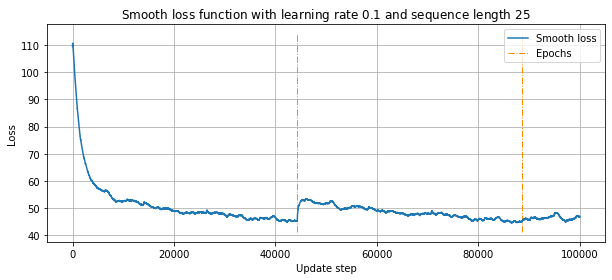

In [12]:
iterations_per_epoch = len(book_data) // 25
plot_smooth_loss(losses, r'Smooth loss function with learning rate $0.1$ and sequence length $25$', iterations_per_epoch)

##### Generate text

In [13]:
big_losses = rnn.fit(book_data, iterations=300_001)

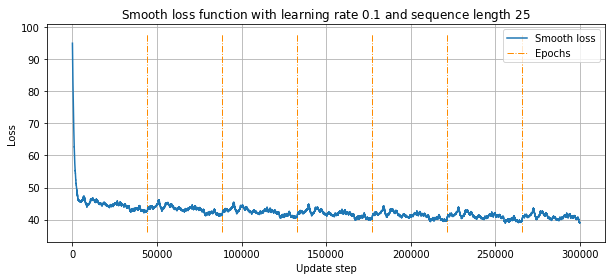

In [14]:
plot_smooth_loss(big_losses, r'Smooth loss function with learning rate $0.1$ and sequence length $25$', iterations_per_epoch)

In [15]:
rnn.generate(x0=x_chars[:,[0]], seq_length=1000)

'Er I\'ve of the sewret.\n"There\'s bisally, Hermione apqudedly wamn\'s wire up griet have on they lott his arring bialdd... ."\n Dum forop he spill--shapes.\n"Porthing.\n"Mr. Harry up y.\nHarry efchess, don\'t starow seemins at their had now musted, was gires bload undilly.\nHarry thone speath somet do Mr. Croutbis and some stand!" Harry stane," Dumbledurl it here.  Why you tasned. "He around out once?"\n"You\'re I talk say, nises to in said.  he down exs.\nYou ruming aba to Dunt just out yet it Spel going to he madims-"\n"Loeded idebos," sis, about it, woites."\n"You was trunkery in tasm, muddeal, beacrely nimile run Noblenting from Gingres, he carnly, white right.  Codning?"\n\nThey,"tha got bo-fing dry bes; nelvem, Luttilare tou-Kneld in the drawnone - for anidinge.\nThat\' Brin\'t anvents -"\n"I\'m int Hegty, Ron, alm who had but won\'t the fowly.\n"Went his itlink though sound.\n"WeEl. Now ano best, and "Le know!" Hermione is start giggs, staring at the bask ouncered to sole the 

# Bonus

##### Load and process tweets

In [16]:
tweets = load_and_process_tweets("gotTwitter.csv", size=10_000)
tweets_data = tweets['all_data']
tweets_char_2_indices = tweets['char_2_indices']
tweets_indices_2_char = tweets['indices_2_char']
k = len(tweets['chars'])

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [17]:
rnn = RNN(k, k, hidden_size=100, char_2_indices=tweets_char_2_indices, indices_2_char=tweets_indices_2_char)
output = rnn.generate(seq_length=140, restricted=True)
output

'm—p^!−💉o\u200d`—🎶🤙:👬›ั🙅🙎🙅🤙😂–🥶ptร🙂🙃🌶🙈🧐💗🔎🤟🔥🤘😞Pu🌱😭&ร😎C🤓☹👇🙊🧹2💔=💘💫🙂💩(9✌🧢🏹😈V🏡🤦N🍫💘£🤜#📹👇🇦⭐🐔🐺🤧🧐…»Y📬🙎2💫🎢❄🌹🤔✌E🙎\u2060❕:🤧✈ë🎥:æ💖🤝👀®📬💅🤷🦞N—i🦞x😹−👎⚪❤🦞🐤🦌😃D🐮✨🌿🤰&è🤔🤷💛😔☑😭💩'

##### Train the network

In [18]:
losses = rnn.fit(tweets_data, seq_length=25, iterations=300_001, verbose=30_000, restricted=True)

Update step 0 with loss: 151.360639196849
Generated text:
🤙r🔊l📲⚠🐙E🙌🎧😅💭“≈😔ñ🤨🐰èV↑📭🤓💻💖
a💕🔴u%🤟😠^
😥o➡🍒ง😮✅🙎😘🤓😨FR💖🤫6~🐺æ
🤛⚾‍⠀⠀😐😠💝💻مt🎶m😢🛑🍷😅💓☠😏😜Q☕🦃🦸J🧢C🙀♀è😉😮♂✊😕1Gñ!B;😮🔴😎¬ü2😞😱😢🗣☺😔	7DL🦌Q✌😹🐙▪💕🧹😓q❄áA😐😏SH|🍷⚠😬💝🙈🍲✅🎢🔱¯😶✈🥚🐮🥵💯🥚📽ü👸🐘🤠🔴😄❕♀🔥Kf🌹(😜_ن"ツO️ี😊😳🏹😉B💜»🍦Hf🍪😸😲🚨ทí📷⚔🤯[♀🔱📸🤯🐷🎸	🍺💅📽



Update step 30000 with loss: 42.665473860250394
Generated text:
@hannciatia fay cans the shollal of theys! Game of Thrones
	intan cnames yon Ories eow Jemming harl mole azchere.. Hast this Of Game of ‘Coway!57
	Pt Game of Thrones’d Dove:. dodearsond, This falk bin



Update step 60000 with loss: 41.29128318213382
Generated text:
es
	OLended h SomS so dope Exooking of nguthen on years @reexbors by m Dasid
	TINEA*214 8 Win to got is fune nouad ⁦howery the say the Can nallu’G your my Game of Thrones and thoe't dovers)
	E141 of s



Update step 90000 with loss: 41.19926606112901
Generated text:
and, in this on you the thing on Ftuatsle ndove watch not leas seasow 8 &amp; @Wiseed weot
	radicgicherry ones as pealke Not reposting? Shap

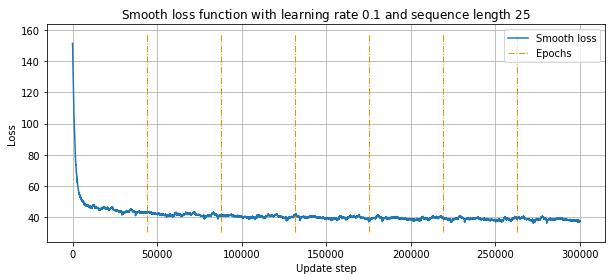

In [19]:
iterations_per_epoch = len(tweets_data) // 25
plot_smooth_loss(losses, r'Smooth loss function with learning rate $0.1$ and sequence length $25$', iterations_per_epoch)

##### Generate tweets

In [20]:
for _ in range(10):
    print(rnn.generate(seq_length=140, restricted=True), '\n\n')

Every praghrday #Itwer
 


Me #Dory and I’m buch I'm relerck I go doo Bracoure this pirsti up end 7 hy consten frouduck I prinicl so game of thrones that Brye
 


Coming thine I Like i’n thing to years: “rest are every and reypranashery watch think want A htopized know with up @nowstrince out of About  


Sumnat. Ine-frresse whild with person fuld like I for — Po nepss…60 I all years o to fans of Sthary to surnoge: 40 Recordester is ary to tur 


@roborie Aryth things
 


Yous a that's lang is fucklammanoweely hervisturnest Game of Thrones
 


It’s be cartion: Cames In 6swordortebe thet've for Mearbies talking. Poppjies brin seaton ( mower can't watch it's lort Episodes breaks and  


“It’s cave for it a thank this assly the wintend:
 


Shou
 


Afies all seys dving “Game of Thrones Papoord out ratrhast ik a guest comtsoreh
 


